# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.DataFrame.merge(study_results,mouse_metadata,how="left",on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_ID = np.array(combined_df[combined_df.duplicated()]['Mouse ID'])

duplicated_mouse_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
for id in duplicated_mouse_ID:
    duplicates = combined_df.loc[combined_df['Mouse ID']==id]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for id in duplicated_mouse_ID:
    clean_data = combined_df[combined_df['Mouse ID'] != id]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
num_mice_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.DataFrame()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_table['Mean Tumor Volume'] = clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
summary_table['Median Tumor Volume'] = clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
summary_table['Tumor Volume Variance'] = clean_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
summary_table['Tumor Volume Std. Dev.'] = clean_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
summary_table['Tumor Volume Std. Err.'] = clean_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


summary_table

C:\Users\anika\AppData\Local\Temp\ipykernel_8272\3788139329.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_table['Mean Tumor Volume'] = clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
C:\Users\anika\AppData\Local\Temp\ipykernel_8272\3788139329.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_table['Median Tumor Volume'] = clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
C:\Users\anika\AppData\Local\Temp\ipykernel_8272\3788139329.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, num

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
means = clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
means = means.rename('mean')
medians = clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
medians = medians.rename('median')
variances = clean_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
variances = variances.rename('var')
stds = clean_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
stds = stds.rename('std')
sems = clean_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
sems = sems.rename('sem')
# Using the aggregation method, produce the same summary statistics in a single line.

combined_summary = pd.concat([means,medians,variances,stds,sems],axis=1)
combined_summary

C:\Users\anika\AppData\Local\Temp\ipykernel_8272\2358291193.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
C:\Users\anika\AppData\Local\Temp\ipykernel_8272\2358291193.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
C:\Users\anika\AppData\Local\Temp\ipykernel_8272\2358291193.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_on

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [17]:
drugs = list(clean_data["Drug Regimen"].unique())
mice = list(clean_data.groupby(["Drug Regimen"]).count()['Mouse ID'])
mice

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

[Text(0.5, 0, 'Drug Regimen'), Text(0, 0.5, 'Number of Mice Tested')]

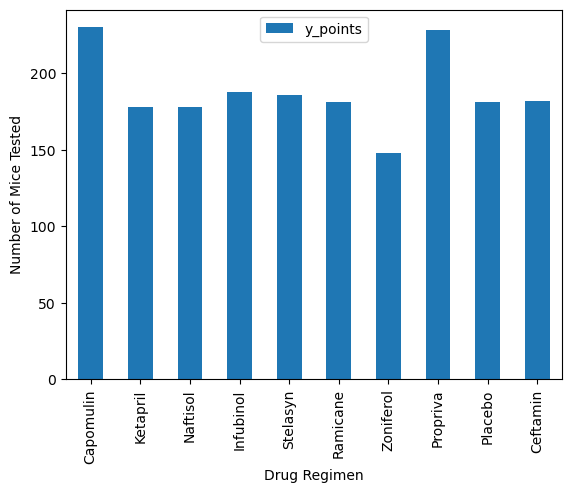

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
graph_data = pd.DataFrame({'x_points':drugs, 'y_points':mice})
ax = graph_data.plot.bar(x='x_points',y="y_points")
ax.set(xlabel="Drug Regimen", ylabel="Number of Mice Tested")

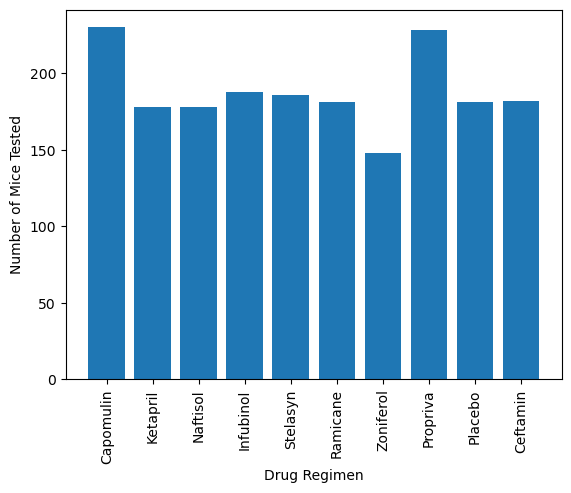

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drugs,mice)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


<Axes: ylabel='Sex'>

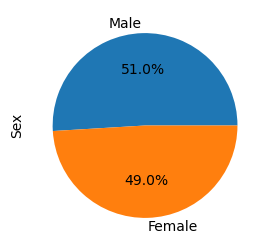

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_value_counts = clean_data["Sex"].value_counts()
pie_pandas = sex_value_counts.plot.pie(y='Sex',autopct='%1.1f%%',figsize=(3,3))
pie_pandas

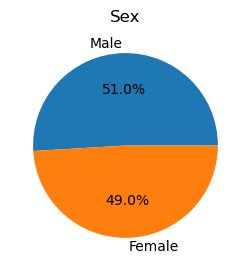

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(3,3))
plt.pie(sex_value_counts,labels=sex_value_counts.index,autopct='%1.1f%%')
plt.title("Sex")
plt.show()

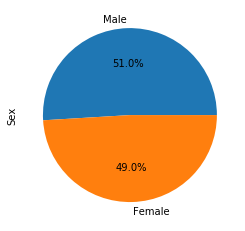

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


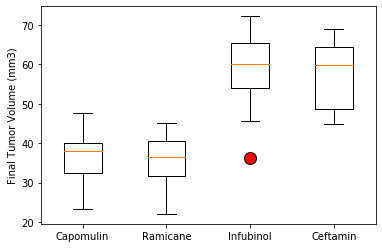

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

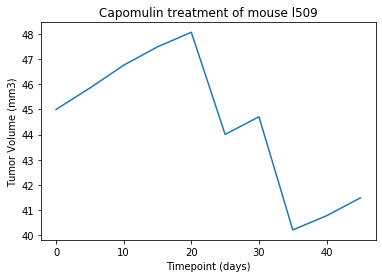

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



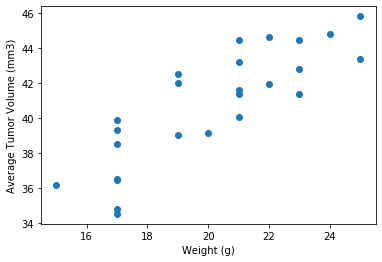

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


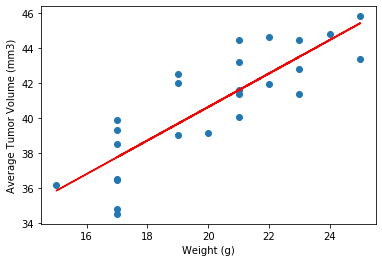

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

